# Task 3. Algorithms for unconstrained nonlinear oprimization. First- and second- order methods

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from sympy import *

In [2]:
np.random.seed(12)
alpha = np.random.random()
beta = np.random.random()

In [3]:
x_k = np.array([i/100 for i in range(101)])
y_k = [alpha * i + beta + np.random.standard_normal() for i in x_k]

In [4]:
E = 0.001

In [5]:
def loss_lin(arg):
    s = 0
    for i in range(101):
        s += ((arg[0] * x_k[i] + arg[1]) - y_k[i])**2
    return s

In [6]:
def linear_gradientdescent():
    
    w = 0.1 
    b = 0.1  
    learning_rate = 0.01

    # Create gradient descent function
    def descend(x, y, w, b, learning_rate): 
        dldw = 0.0 
        dldb = 0.0 
        N = x.shape[0]
        # loss = (y-(wx+b)))**2
        for xi, yi in zip(x,y): 
            dldw += -2*xi*(yi-(w*xi+b))
            dldb += -2*(yi-(w*xi+b))

        # Make an update to the w parameter 
        w = w - learning_rate*(1/N)*dldw
        b = b - learning_rate*(1/N)*dldb
        return w, b

    # Iteratively make updates
    for epoch in range(1000): 
        w,b = descend(x_k,y_k,w,b,learning_rate)
        yhat = w*x_k + b
        loss = np.divide(np.sum((y_k-yhat)**2, axis=0), x_k.shape[0])    
    return w, b

In [7]:
lin_gd = linear_gradientdescent()

In [8]:
lin_cg = optimize.fmin_cg(loss_lin, [1, 1], full_output=1)

Optimization terminated successfully.
         Current function value: 111.037785
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


In [9]:
def grad_loss_lin(arg):
    g = np.zeros(len(arg))
    for i in range(101):
        g[1] += 2 * (arg[0] * x_k[i] + arg[1] - y_k[i])
        g[0] += 2 * x_k[i] * (arg[0] * x_k[i] + arg[1] - y_k[i])
    return g

lin_nw = optimize.minimize(loss_lin, [0,0], jac=grad_loss_lin, method='Newton-CG',tol=E)

In [10]:
def lssln(arg, x, y):
    return (arg[0] * x + arg[1]) - y

In [11]:
lin_lma = optimize.least_squares(lssln, [0,0], method='lm', args=(x_k, y_k))

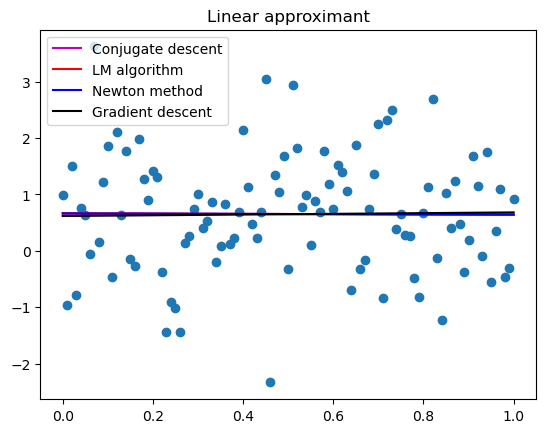

In [12]:
plt.scatter(x_k, y_k)
plt.title('Linear approximant')
plt.plot(x_k, lin_cg[0][0] * x_k + lin_cg[0][1], 'm', label='Conjugate descent')
plt.plot(x_k, lin_lma.x[0] * x_k + lin_lma.x[1], 'r', label='LM algorithm')
plt.plot(x_k, lin_nw.x[0] * x_k + lin_nw.x[1], 'b', label='Newton method')
plt.plot(x_k, lin_gd[0] * x_k + lin_gd[1], 'k', label='Gradient descent')
plt.legend()

In [13]:
def loss_rat(arg):
    s = 0
    for i in range(101):
        s += ((arg[0] / 1 + arg[1] * x_k[i]) - y_k[i]) ** 2
    return s

In [14]:
def rational_gradientdescent():
    
    w = 0.1 
    b = 0.1  
    learning_rate = 0.01

    
    # Create gradient descent function
    def descend(x, y, w, b, learning_rate): 
        dldw = 0.0
        dldb = 0.0 
        N = x.shape[0]
        for xi, yi in zip(x,y): 
            dldw += 2*(w/(1+b*xi)-yi)/(1+b*xi)
            dldb += 2*(w/(1+b*xi)-yi)*(-xi*w/(1+b*xi)**2)

        # Make an update to the w parameter 
        w = w - learning_rate*(1/N)*dldw
        b = b - learning_rate*(1/N)*dldb
        return w, b

    
    # Iteratively make updates
    for epoch in range(1000): 
        w,b = descend(x_k,y_k,w,b,learning_rate)
        yhat = w / (1 + b * x_k)
        loss = np.divide(np.sum((y_k-yhat)**2, axis=0), x_k.shape[0])    
    return (w, b)

In [15]:
rat_dg = rational_gradientdescent()

In [16]:
rat_cg = optimize.fmin_cg(loss_rat, [0, 0], full_output=1)

Optimization terminated successfully.
         Current function value: 111.037785
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


In [17]:
def grad_loss_rat(arg):
    g = np.zeros(len(arg))
    for i in range(101):
        g[0] += 2*(arg[0]/(1+arg[1]*x_k[i])-y_k[i])/(1+arg[1]*x_k[i]) 
        g[1] += 2*(arg[0]/(1+arg[1]*x_k[i])-y_k[i])*(-x_k[i]*arg[0]/(1+arg[1]*x_k[i])**2)
    return g

rat_nw = optimize.minimize(loss_rat, [0,0], jac=grad_loss_rat, method='Newton-CG', tol=E)

In [18]:
def lssrt(arg, x, y):
    return (arg[0] / (1 + x * arg[1])) - y

In [19]:
rat_lma = optimize.least_squares(lssrt, [0,0], method='lm', args=(x_k, y_k))

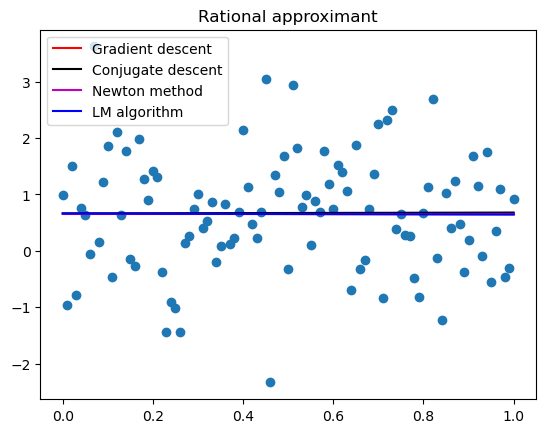

In [20]:
plt.scatter(x_k, y_k)
plt.title('Rational approximant')
plt.plot(x_k, rat_dg[0] / (1 + rat_dg[1] * x_k), 'r', label='Gradient descent')
plt.plot(x_k, rat_cg[0][0] / (1 + rat_cg[0][1] * x_k), 'k', label='Conjugate descent')
plt.plot(x_k, rat_nw.x[0] / (1 + rat_nw.x[1] * x_k), 'm', label='Newton method')
plt.plot(x_k, rat_lma.x[0] / (1 + rat_lma.x[1] * x_k), 'b', label='LM algorithm')
plt.legend()

# Compare with algorithms from second task

In [21]:
def linear(x, a, b):
    return a*x + b

def rational(x, a, b):
    return a/(1+b*x)

def multi_exhaustive_search(function):
    res = []
    coeff = []
    it = 0
    func_eval = 0
    for i in range(101):
        i /= 100
        for j in range(101):
            j /= 100
            temp = 0
            for k in range(101):
                it += 1
                temp += (function(x_k[k], i, j) - y_k[k])**2
                func_eval += 1
            res.append(temp)
            coeff.append([i, j])
    param = coeff[res.index(min(res))]
    return param, it, func_eval

def lin_coord_des():
    f_eval = 0
    its = 0
    tempa = 0.001
    tempb = 0.001
    while True:
        its += 1
        resa = []
        resb = []
        for a in range(1001):
            a /= 1000
            temp = 0
            for k in range(101):
                f_v = ((a * x_k[k] + tempb) - y_k[k])**2
                f_eval += 1
                temp += f_v
            resa.append(temp)
        nexta = resa.index(min(resa)) / 1000
        if abs(tempa - nexta) < E and abs(tempb - nextb) < E:
            break
        tempa = nexta

        for b in range(1001):
            b /= 1000
            temp = 0
            for k in range(101):
                f_v = ((tempa * x_k[k] + b) - y_k[k])**2
                temp += f_v
                f_eval += 1
            resb.append(temp)
        nextb =  resb.index(min(resb)) / 1000
        tempb = nextb
    return (tempa, tempb), its, f_eval

def rat_coord_des():
    its = 0
    f_eval = 0
    tempa = 0.001
    tempb = 0.001
    while True:
        its += 1
        resa = []
        resb = []
        for a in range(1001):
            a /= 1000
            temp = 0
            for k in range(101):
                f_v = ((a / (1 + x_k[k] * tempb)) - y_k[k])**2
                f_eval += 1
                temp += f_v
            resa.append(temp)
        nexta = resa.index(min(resa)) / 1000
        if abs(tempa - nexta) < E and abs(tempb - nextb) < E:
            break
        tempa = nexta

        for b in range(1001):
            b /= 1000
            temp = 0
            for k in range(101):
                f_v = ((tempa * x_k[k] + b) - y_k[k])**2
                f_eval += 1
                temp += f_v
            resb.append(temp)
        nextb =  resb.index(min(resb)) / 1000
        tempb = nextb
    return (tempa, tempb), its, f_eval
                

def lin_nelder_mead():
    param = [0, 0]
    
    
    def linear(args):
        temp = 0
        for i in range(101):
            temp += (args[0] * x_k[i] + args[1] - y_k[i])**2
        return temp
        
    res = optimize.minimize(linear, param, method='Nelder-Mead', tol=E)
    return res

def rat_nelder_mead():
    param = [0, 0]
    
    
    def rational(args):
        temp = 0
        for i in range(101):
            temp += (args[0] / (1 + args[1] * x_k[i]) - y_k[i])**2
        return temp
        
    res = optimize.minimize(rational, param, method='Nelder-Mead', tol=E)
    return res

linear_ex = multi_exhaustive_search(linear)

rational_ex = multi_exhaustive_search(rational)

lin_coord_des_res = lin_coord_des()

rat_coord_des_res = rat_coord_des()

lin_nelder_mead_res = lin_nelder_mead()

rat_nelder_mead_res = rat_nelder_mead()

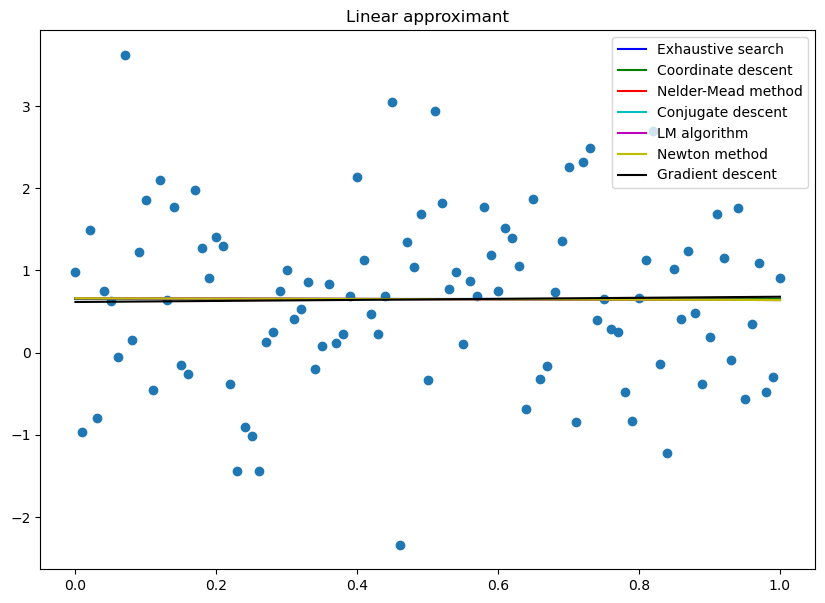

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(x_k, y_k)
plt.title('Linear approximant')
plt.plot(x_k, linear_ex[0][0] * x_k + linear_ex[0][1], 'b', label='Exhaustive search')
plt.plot(x_k, lin_coord_des_res[0][0] * x_k + lin_coord_des_res[0][1], 'g', label='Coordinate descent')
plt.plot(x_k, lin_nelder_mead_res.x[0] * x_k + lin_nelder_mead_res.x[1], 'r', label='Nelder-Mead method')
plt.plot(x_k, lin_cg[0][0] * x_k + lin_cg[0][1], 'c', label='Conjugate descent')
plt.plot(x_k, lin_lma.x[0] * x_k + lin_lma.x[1], 'm', label='LM algorithm')
plt.plot(x_k, lin_nw.x[0] * x_k + lin_nw.x[1], 'y', label='Newton method')
plt.plot(x_k, lin_gd[0] * x_k + lin_gd[1], 'k', label='Gradient descent')
plt.legend()

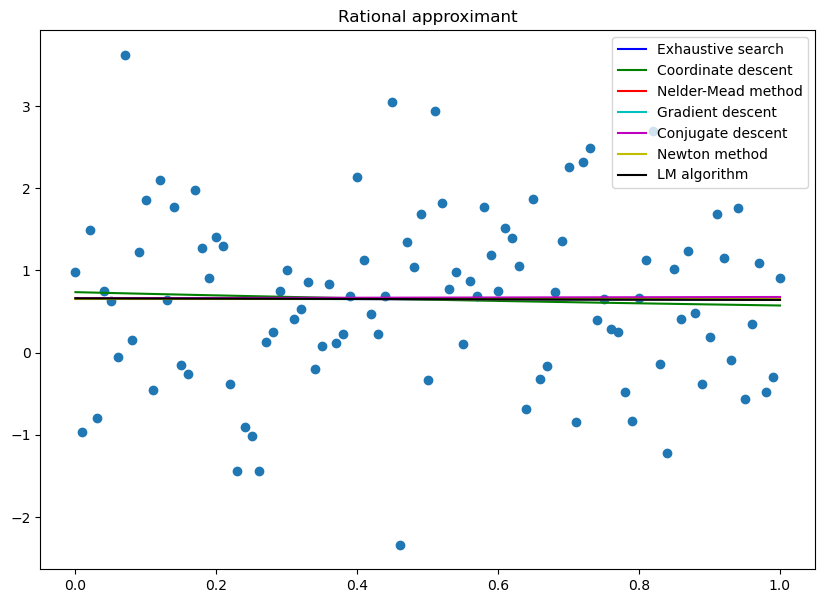

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x_k, y_k)
plt.title('Rational approximant')
plt.plot(x_k, rational_ex[0][0] / (1 + x_k * rational_ex[0][1]), 'b', label='Exhaustive search')
plt.plot(x_k, rat_coord_des_res[0][0] / (1 + x_k * rat_coord_des_res[0][1]), 'g', label='Coordinate descent')
plt.plot(x_k, rat_nelder_mead_res.x[0] / (1 + x_k * rat_nelder_mead_res.x[1]), 'r', label='Nelder-Mead method')
plt.plot(x_k, rat_dg[0] / (1 + rat_dg[1] * x_k), 'c', label='Gradient descent')
plt.plot(x_k, rat_cg[0][0] / (1 + rat_cg[0][1] * x_k), 'm', label='Conjugate descent')
plt.plot(x_k, rat_nw.x[0] / (1 + rat_nw.x[1] * x_k), 'y', label='Newton method')
plt.plot(x_k, rat_lma.x[0] / (1 + rat_lma.x[1] * x_k), 'k', label='LM algorithm')
plt.legend()